QoS 실습은 History, Reliability, Durability, Deadline, Lifespan, Liveliness의 6가지 QoS에 대해 demo_nodes_cpp, image_tools, quality_of_service_demo,  my_first_ros_rclpy_pkg 패키지를 이용하여 각 사용 방법을 알아보도록 하겠다.

# History

History은 데이터 전송 시점 이후의 데이터를 몇개나 보관하냐를 결정하는 QoS 옵션으로 KEEP_LAST으로 설정하면 depth로 설정한 메시지 큐 사이즈 만큼의 데이터를 보관하고, KEEP_ALL으로 설정하면 모든 데이터를 보관 (메시지 큐의 사이즈는 DDS 벤더마다 다름)한다.

아래 실습에서는 KEEP_ALL의 동작을 위하여 Durability은 TRANSIENT_LOCAL으로 설정하여 Subscription이 생성되기 전의 데이터도 보관하도록 하였다. 참고로 이 설정과 관련해서는 my_first_ros_rclpy_pkg 패키지를 수정하여 테스트하였다.

/my_first_ros_rclpy_pkg/helloworld_publisher.py

https://github.com/robotpilot/ros2-seminar-examples/blob/main/my_first_ros_rclpy_pkg/

/my_first_ros_rclpy_pkg/helloworld_subscriber.py

https://github.com/robotpilot/ros2-seminar-examples/blob/main/my_first_ros_rclpy_pkg/

우리는 이전 강좌에서 helloworld_publisher.py와 helloworld_subscriber.py을 작성할 때 다음과 같이 QoSProfile으로 하여 기본 값인 rmw_qos_profile_default를 사용하였고 depth만 10으로 설정하였었다. 이는 기본 설정이기에 다음 이어지는 내용과 같이 변경하여 KEEP_ALL을 테스트해보자. 참고로 이 강좌에서는 helloworld_publisher.py 및 helloworld_subscriber.py 모두 바꾸기로 한다.

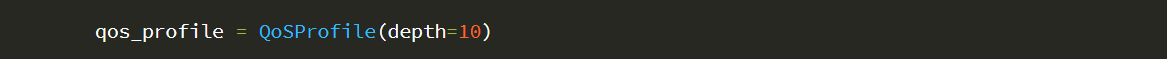

History를 KEEP_LAST 로 변경할 때는 다음과 같이 변경하면 된다.

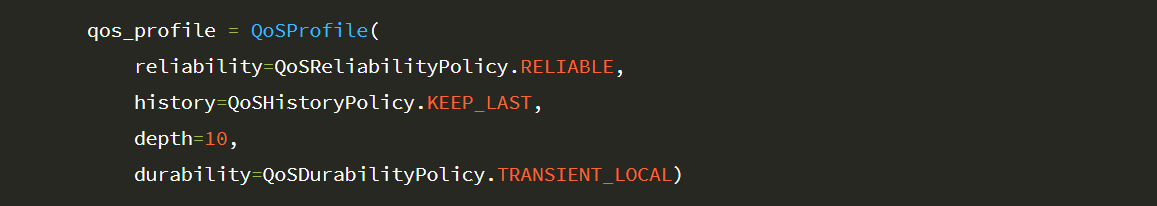

History를 KEEP_ALL 로 변경할 때는 다음과 같이 변경하면 된다.

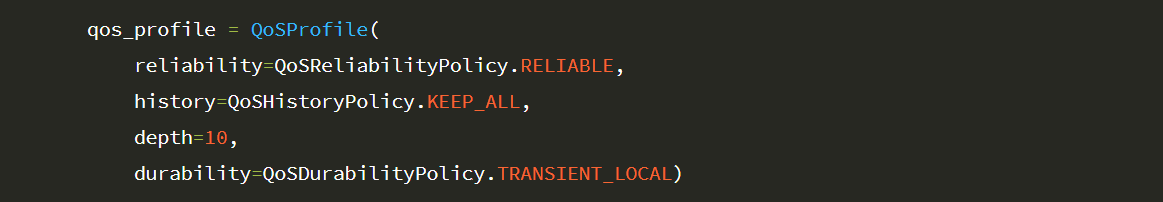

다음은 History를 KEEP_ALL 로 변경했을 때의 결과이다. 기본 설정인 KEEP_LAST로 할 경우는 지정한 depth인 10개의 메시지만 보관하지만 KEEP_ALL으로 설정한 후 helloworld_publisher 노드를 실행한지 한참 후에 helloworld_subscriber를 실행하여도 helloworld_subscriber를 실행시키기 전인 메시지 모두를 전부 서브스크라브하는 결과를 확인할 수 있다.

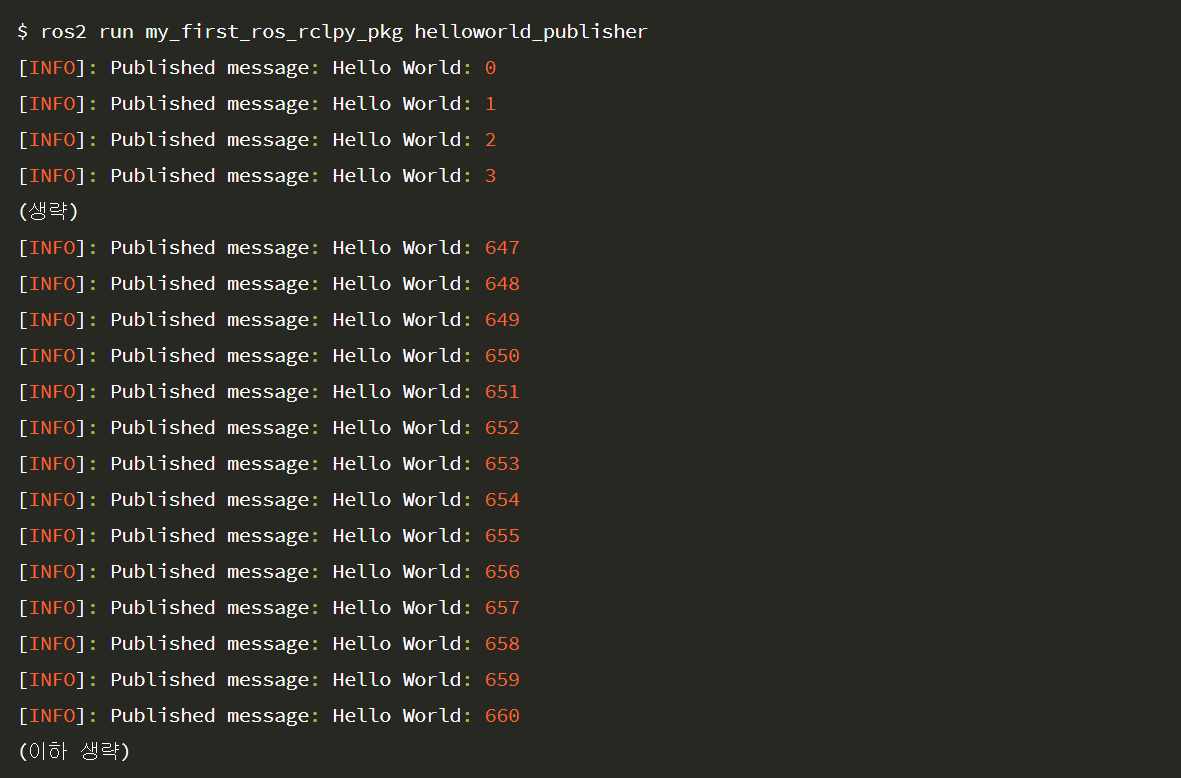

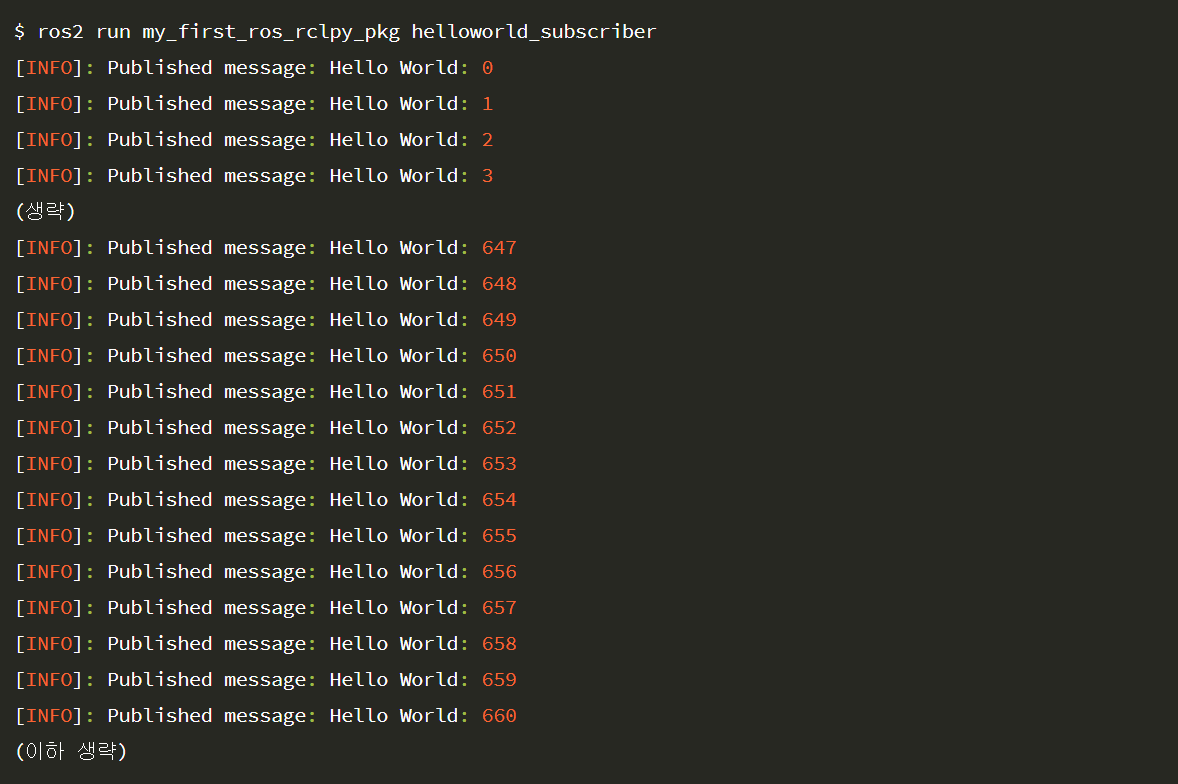

# Reliability

이전 QoS 강좌에서 "TCP처럼 데이터 손실을 방지함으로써 신뢰도를 우선시하거나 (RELIABLE), UDP처럼 통신 속도를 최우선시하여 사용(BEST_EFFORT) 할 수 있게 하는 신뢰성(reliability) 기능이 대표적으로 사용되고 있다"라고 설명했다. 이번 예제에서는 프로그래밍까지는 아니더라도 간단한 테스트로 이 기능을 시험해보자. 이 테스트에서는 `tc(traffic control)`라는 리눅스 네트워크 트래픽 제어 유틸리티를 사용하여 임의의 데이터 손실(10%)을 만들어 reliability성을 테스트해보았다.

/topics/listener.cpp

https://github.com/ros2/demos/tree/master/demo_nodes_cpp



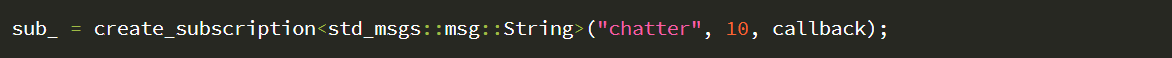

/topics/listener_best_effort.cpp

https://github.com/ros2/demos/tree/master/demo_nodes_cpp

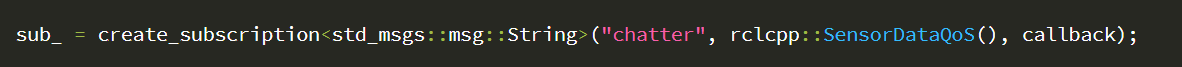

* listener_best_effort.cpp 의 내용을 보면 서브스크라이버를 선언할 때 QoS를 SensorDataQoS 이라고 하였는데 이는 rmw_qos_profile_sensor_data를 의미한다.

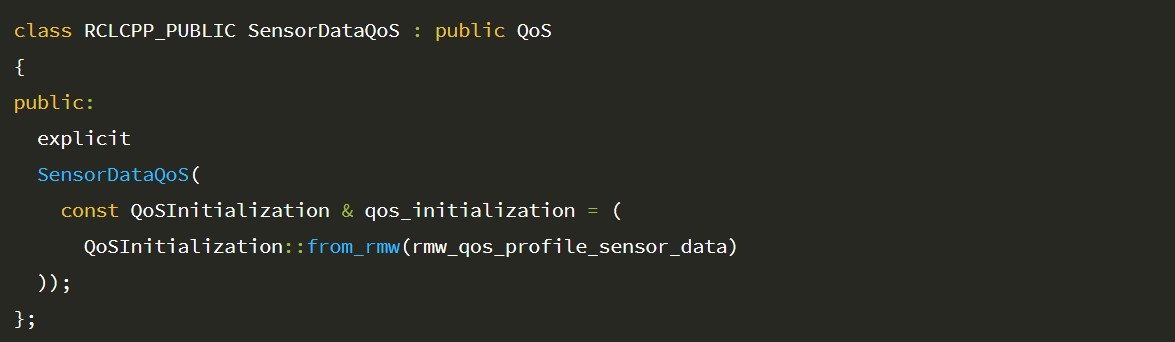

Reliability = RELIABLE

demo_nodes_cpp 패키지의 listener 노드는 Reliability의 기본 설정인 RELIABLE 으로 되어 있다. 그렇기에 데이터 손실이 있어도 TCP와 같이 ack로 매번 확인하여 손실된 데이터를 재전송하게 되며 아래 예제와 같이 잃어버리는 데이터가 없다. 단 손실이 있는 시점에서 터미널 창이 잠시 멈추는 것을 확인할 수 있는데 이때에 손실된 데이터를 순차적으로 재전송하고 다시 ack 작업을 하기 때문이다.

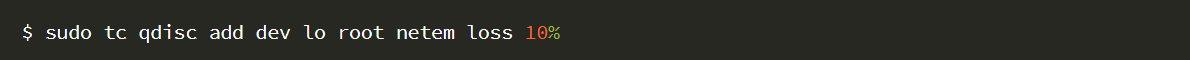

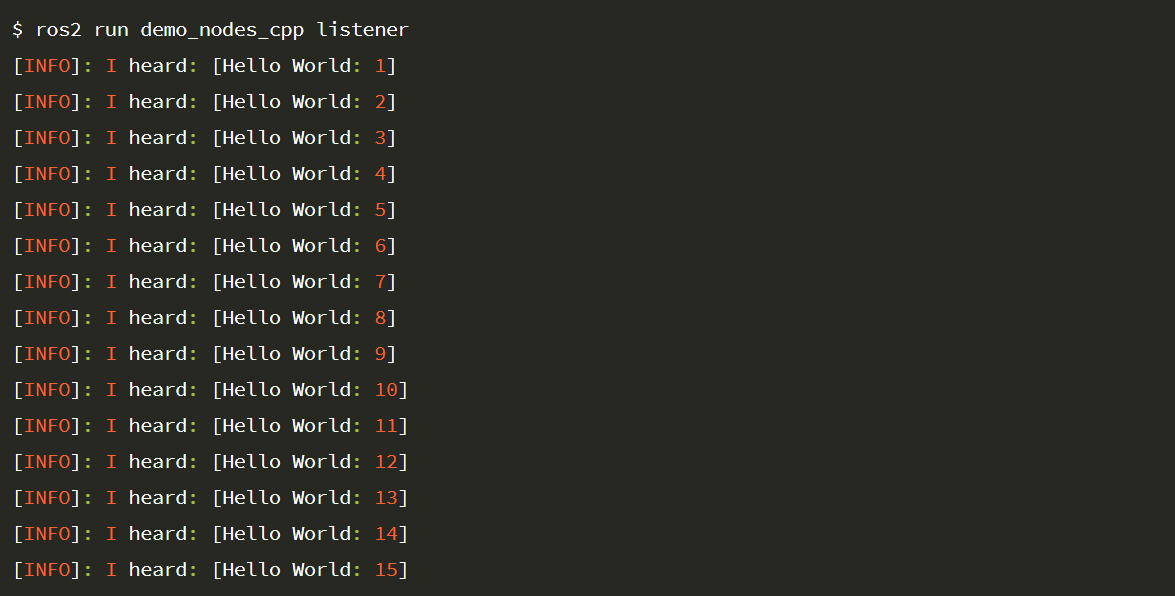

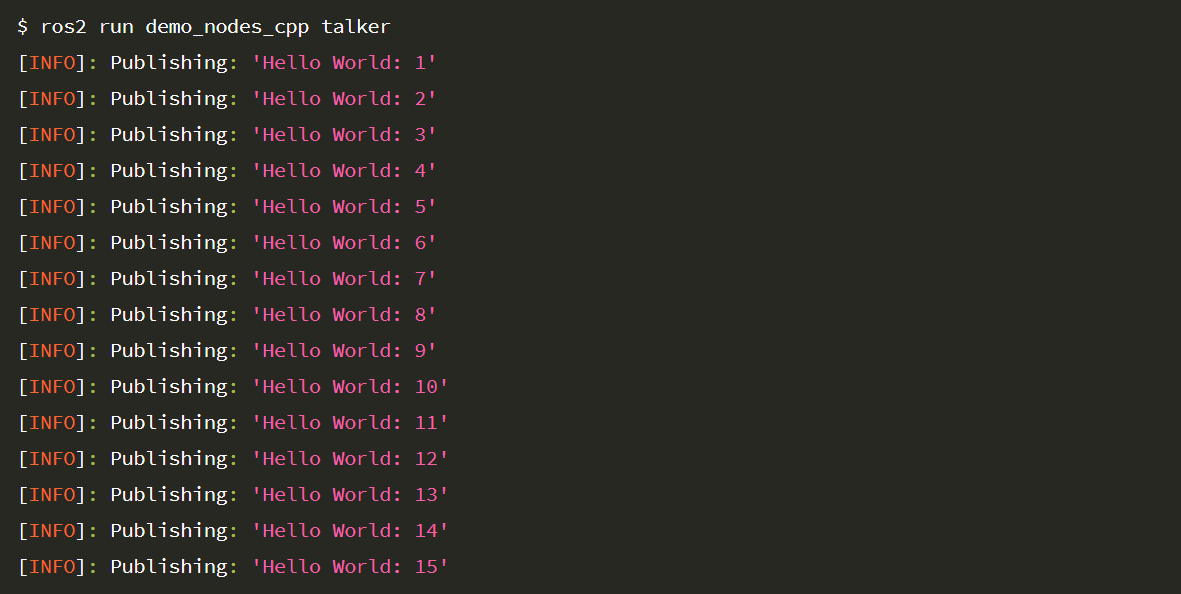

Reliability =  BEST_EFFORT

우선 위에서 실행시킨 listener 노드와 talker를 종료하고 아래와 같이 실행하자. 이번에는 demo_nodes_cpp 패키지의 listener_best_effort 노드를 사용할 것이다. 이 노드는 Reliability의 설정을 RELIABLE이 아닌 BEST_EFFORT 으로 되어 있다.

그렇기에 다음 예제와 같이 talker노드는 1부터 15까지 온전히 데이터를 전송했지만 수신받는 listener_best_effort노드는 데이터 손실로 인하여 "2"과 "9"가 손실된 채 표시되고 있다. RELIABLE 설정과는 다른 결과가 나왔는데 신뢰성 중심이 아닌 속도 중심이고 데이터 손실이 있어도 문제없는 데이터라면 Reliability를 BEST_EFFORT으로 설정하여 사용하면 될 것이다. 위에서 끊김의 원인이 되었던 재전송을 수행하지 않음도 느낄 수 있을 것이다.

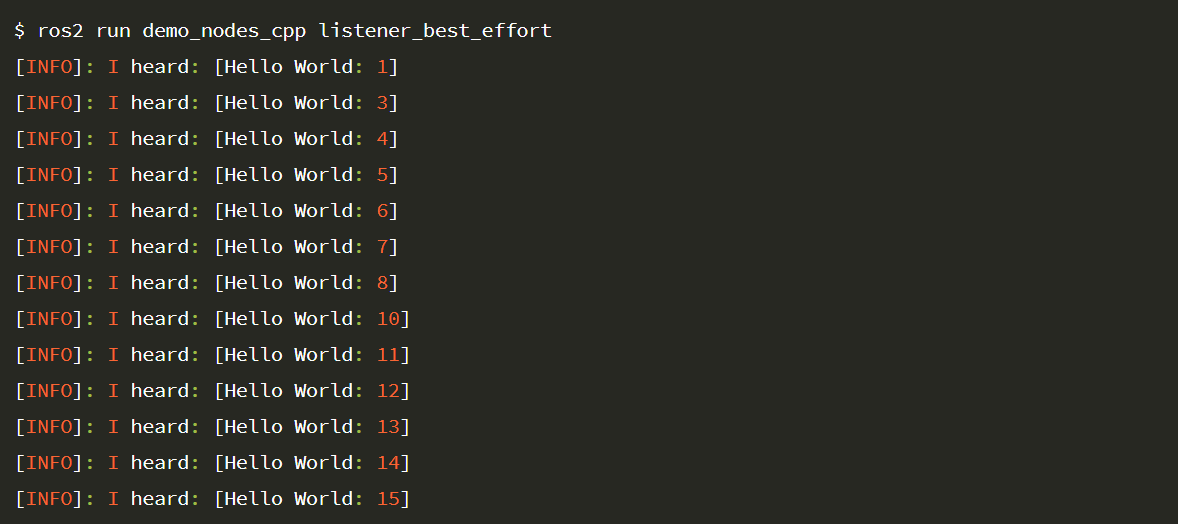

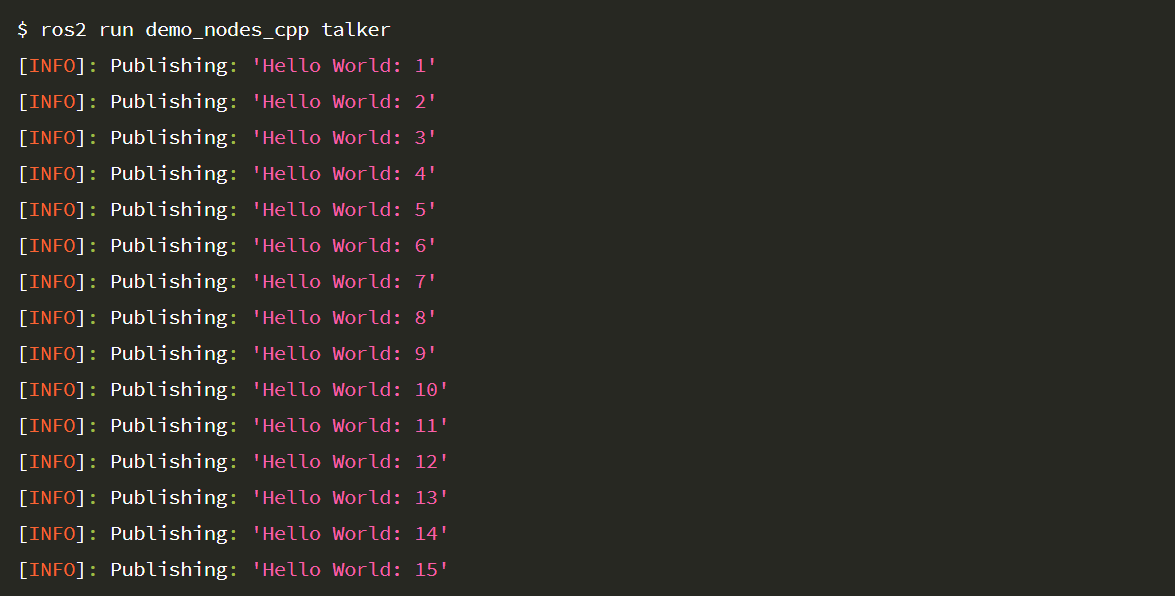

모든 테스트가 끝났다면 아래 명령어를 통해 tc로 설정한 데이터 손실 명령을 '반드시' 해제하도록 하자.

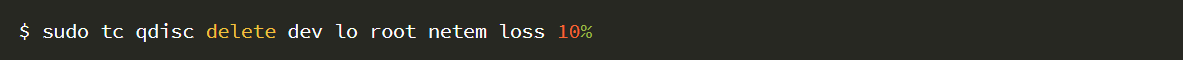

# Durability

Durability은 데이터를 수신하는 서브스크라이버가 생성되기 전의 데이터를 사용할지 폐기할지에 대한 QoS 옵션으로 TRANSIENT_LOCAL으로 설정하면 Subscription이 생성되기 전의 데이터도 보관 (Publisher에만 적용 가능)하게 된다.

참고로 이 때 depth으로 지정하는 history의 큐 사이즈에 따라 가져올 수 있는 메시지 수가 정해진다. 그리고 VOLATILE으로 설정하면 Subscription이 생성되기 전의 데이터는 사용하지 않게 된다. 참고로 기본 설정은 VOLATILE를 사용하고 있다.

/my_first_ros_rclpy_pkg/helloworld_publisher.py

https://github.com/robotpilot/ros2-seminar-examples/blob/main/my_first_ros_rclpy_pkg/

/my_first_ros_rclpy_pkg/helloworld_subscriber.py

https://github.com/robotpilot/ros2-seminar-examples/blob/main/my_first_ros_rclpy_pkg/

VOLATILE 으로 설정할 때의 코드는 다음과 같다.

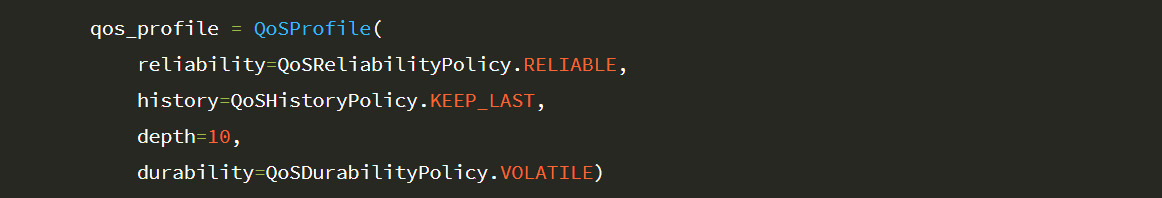

TRANSIENT_LOCAL 으로 설정할 때의 코드는 다음과 같다.

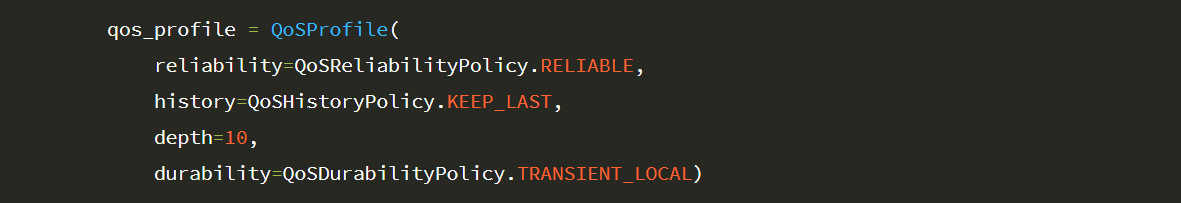

위 코드 중 durability 설정을 TRANSIENT_LOCAL 으로 변경하고 아래의 예제를 실행하게 되면 helloworld_publisher 노드를 실행 한 후, 시간을 두고 helloworld_subscriber 노드를 실행해도 depth로 설정한 10개의 데이터는 보관하고 있다가 수신 받을 수 있다는 것을 확인할 수 있다.



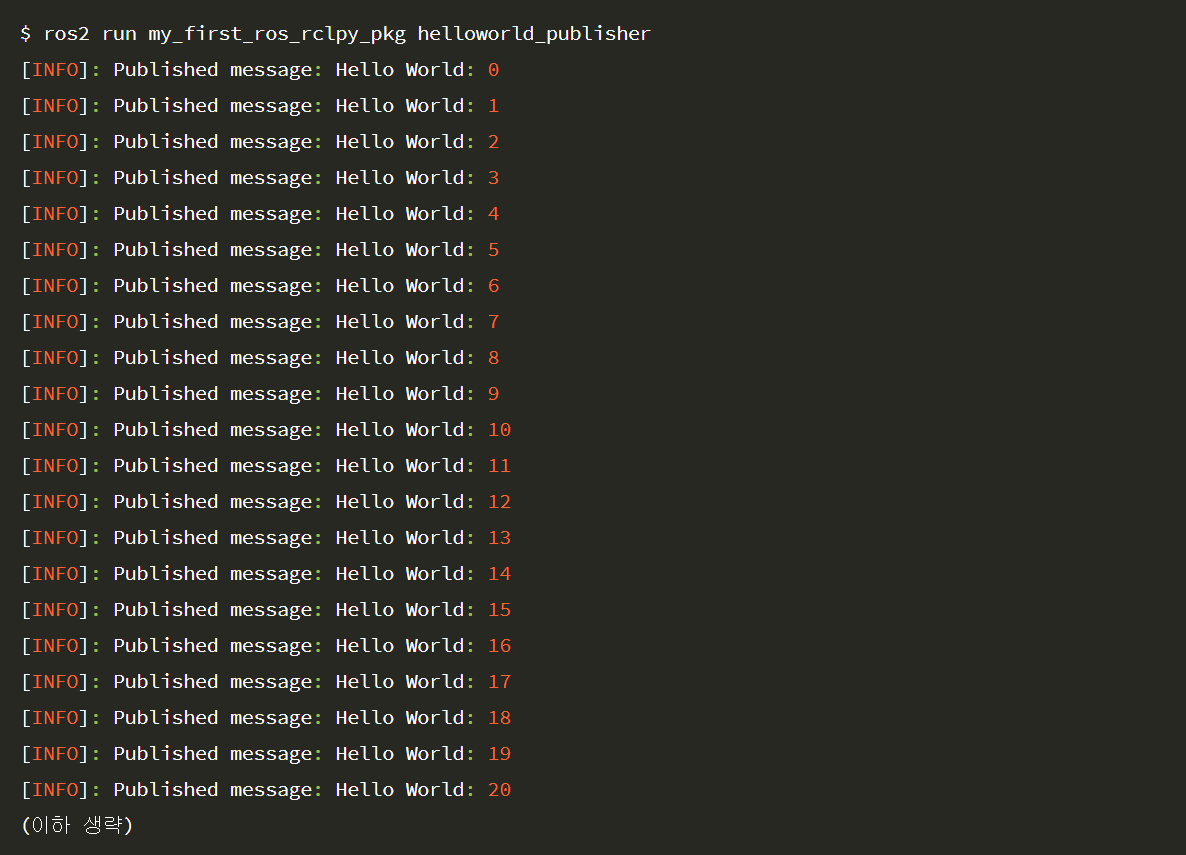

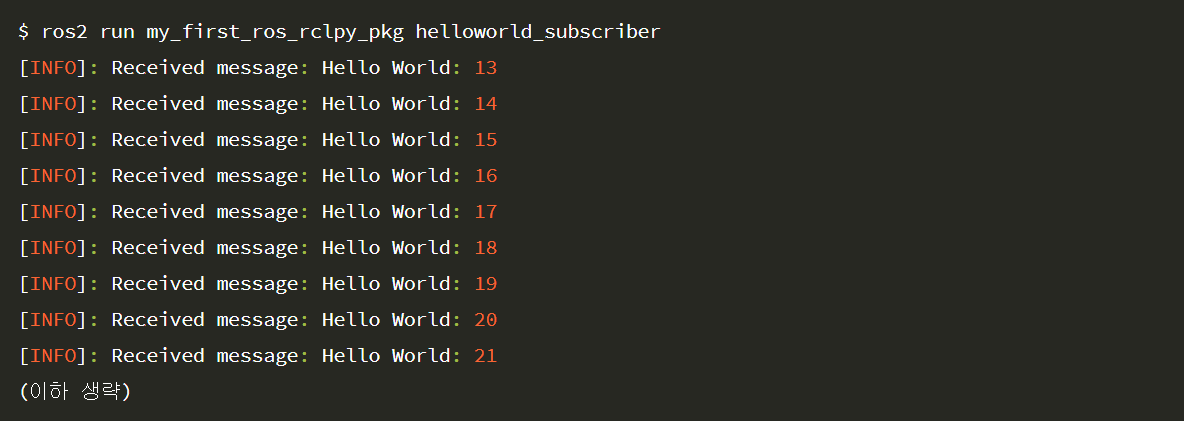

# Deadline

Deadline은 정해진 주기 안에 데이터가 발신 및 수신되지 않을 경우 EventCallback를 실행시키는 QoS 옵션으로 Deadline을 확인하는 주기 값을 설정하게 되어 있다. Deadline은 quality_of_service_demo 예제의 deadline.py 를 살펴보고 실행해보면서 더 자세히 알아보자. 하기 코드와 같이 토픽 퍼블리셔인 Talker와 토픽 서브스크라이버인 Listener 모두 qos_profile으로 QoS를 동일하게 설정하였는데 주어진 deadline 주기에 따라 EventCallback를 호출하게 되어 있다. 다음 예제 코드에서는 deadline 주기를 노드 실행시 실행 인자로 넣어주게 된다.

/quality_of_service_demo_py/deadline.py

https://github.com/ros2/demos/tree/master/quality_of_service_demo



하기와 같이 실행하면 /qos_talker 노드와 /qos_listener 노드가 함께 실행된다. 이 때에 0.7초라는 값으로 Deadline이 설정된다. 즉, 0.7초 안에 데이터가 발신 및 수신되지 않을 경우 EventCallback를 실행시키게 된다. 다른 옵션 값으로 3초 동안 데이터가 발신되고 0초로 pause 값을 설정하였기에 쉼 없이 발신하게 된다.

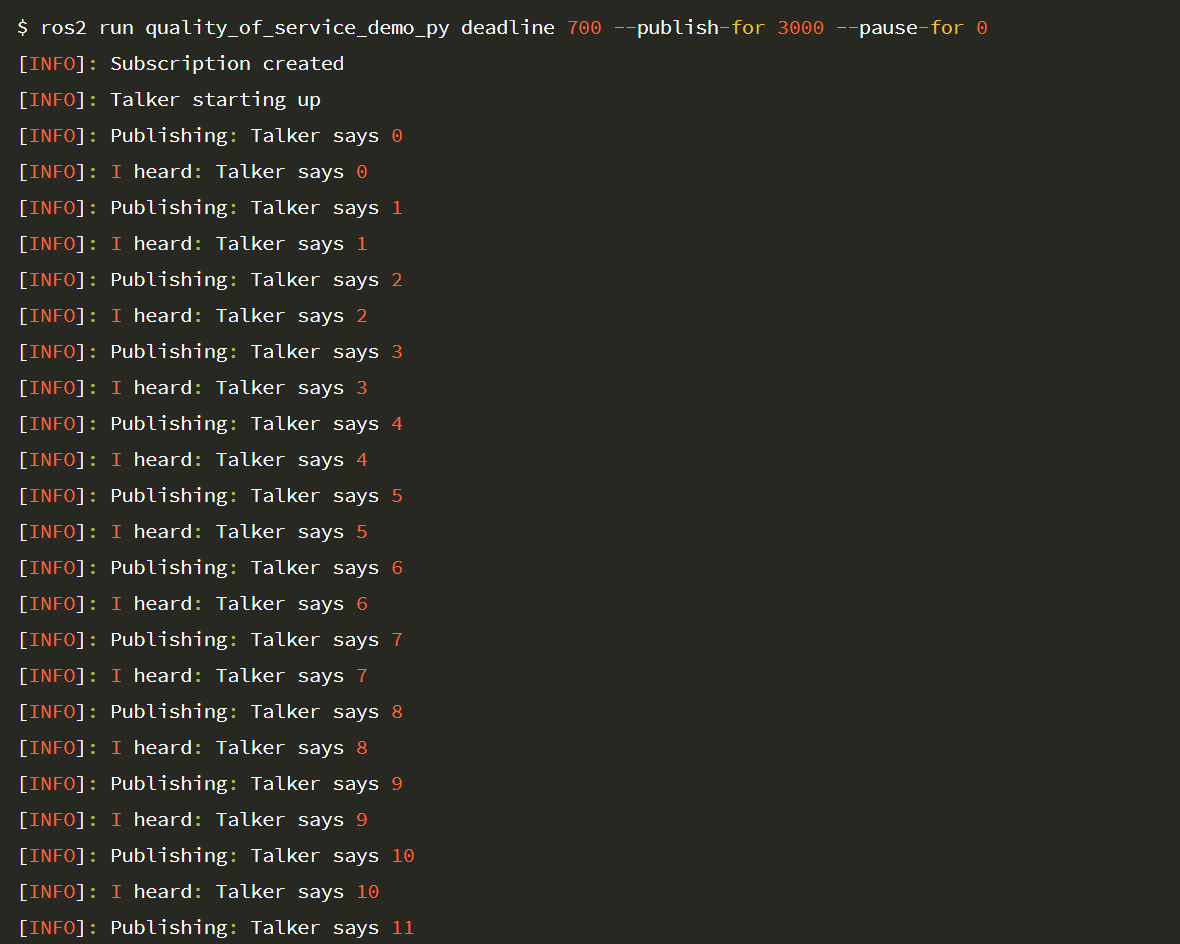

이번에는 Deadline 주기를 초과하여 EventCallback이 발생되게 설정해보자. 다음과 같이 pause 값을 1초로 설정하게 되면 3초 동안 발신하다가 1초를 쉬게 된다. 그런데 Deadline 주기가 0.7초이기에 /qos_talker 노드와 /qos_listener 노드가 각각 EventCallback이 발생하여 특정 메시지가 표시됨을 확인할 수 있다.

이렇게 Deadline는 토픽의 QoS 설정으로 추가하여 정해진 시간안에 퍼블리시 못하거나 서브스크라이브하지 못할 때 이벤트 콜백 함수를 만들어 특정 루틴을 수행하게 할 수 있다.

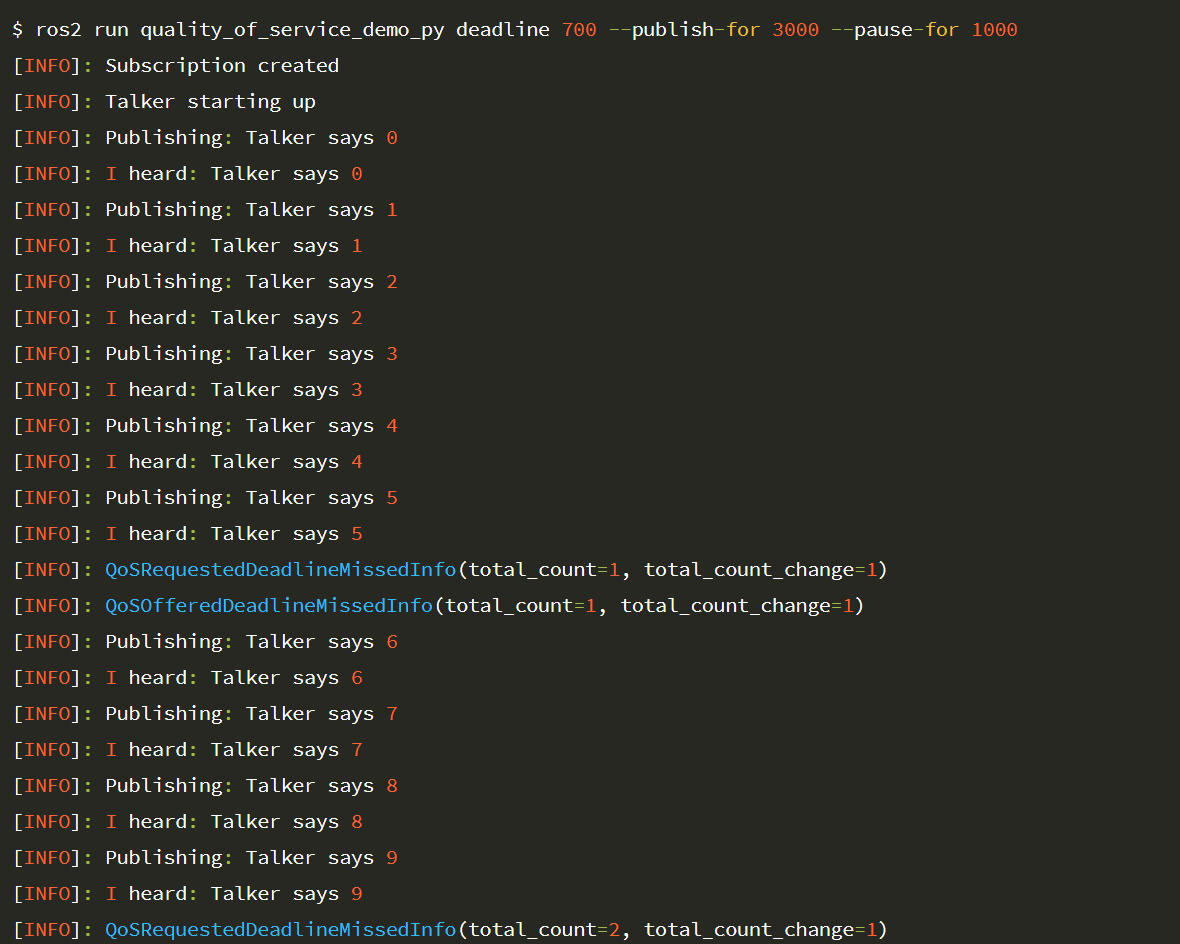

# Lifespan

Lifespan은 정해진 주기 안에서 수신되는 데이터만 유효 판정하고 그렇지 않은 데이터는 삭제하는 QoS 옵션으로 Lifespan을 확인하는 주기값을 설정하게 되어 있다. Lifespan은 quality_of_service_demo 예제의 lifespan.py 를 살펴보고 실행해보면서 더 자세히 알아보자.

하기 예제 코드에서는 Lifespan을 테스트하기 위해서 토픽 퍼블리셔인 Talker와 토픽 서브스크라이버인 Listener 모두 동일 qos_profile으로 depth는 10, reliability는 RELIABLE, durability는 TRANSIENT_LOCAL로 설정하였고 Lifespan 주기를 노드 실행시 실행 인자로 넣어주게 된다.

/quality_of_service_demo_py/lifespan.py

https://github.com/ros2/demos/tree/master/quality_of_service_demo

하기와 같이 실행하면 /qos_talker 노드와 /qos_listener 노드가 함께 실행된다. 이 때에 1초라는 값으로 Lifespan이 설정된다. 즉, 1초 안에 수신되는 데이터만 유효 판정하고 그렇지 않은 데이터는 퍼블리셔의 메시지 큐에서 삭제하게된다. 아래의 예제는 Talker가 10개의 데이터를 순차적으로 퍼블리시하게 되는데 Listener는 3초 후 부터 시작되도록 설정하였고 Lifespan이 1초로 설정되어 있어서 '4'가 퍼블리시 된 후에 Listener가 시작되었음에도 불구하고 '4'를 받을 수 있었고 1초 이전의 데이터들은 모두 삭제되어 수신받지 못하게 된 것이다.

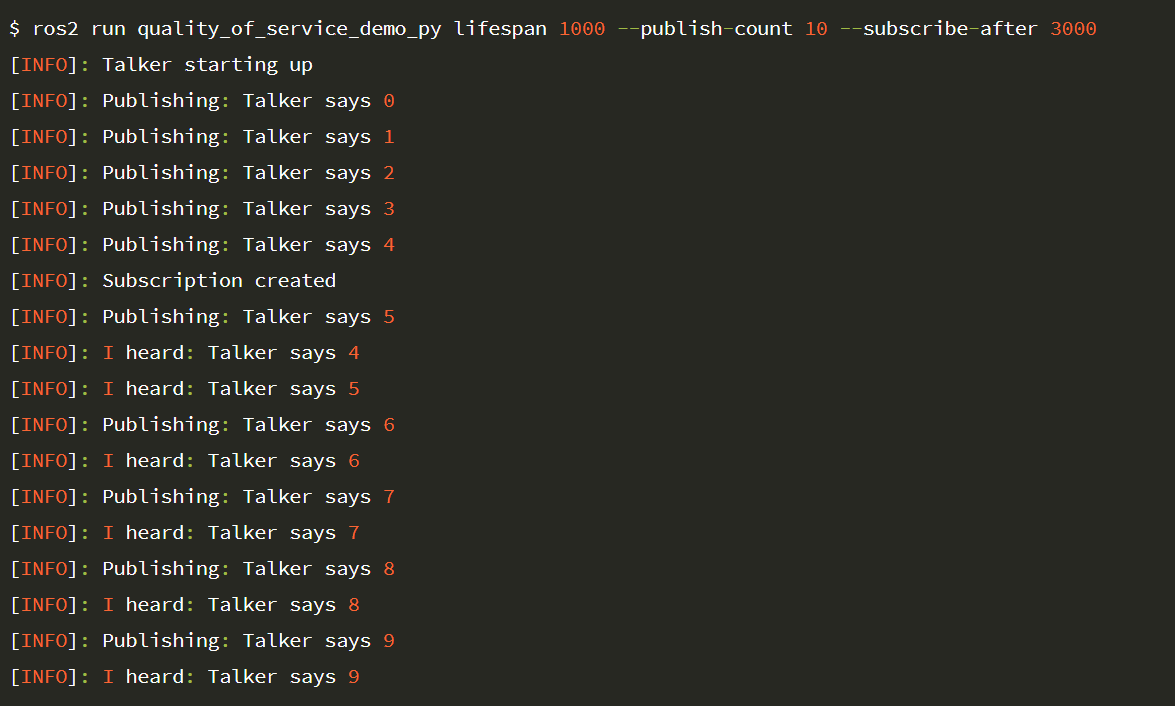

만약 하기와 같이 Lifespan을 4초라는 값으로 설정하게 된다면 Listener이 뒤늦게 시작되었어도 기존 4초 전의 데이터들도 퍼블리셔의 메시지 큐에 저장하였다가 서브스크라이버에게 전송할 수 있다는 것을 확인할 수 있다.

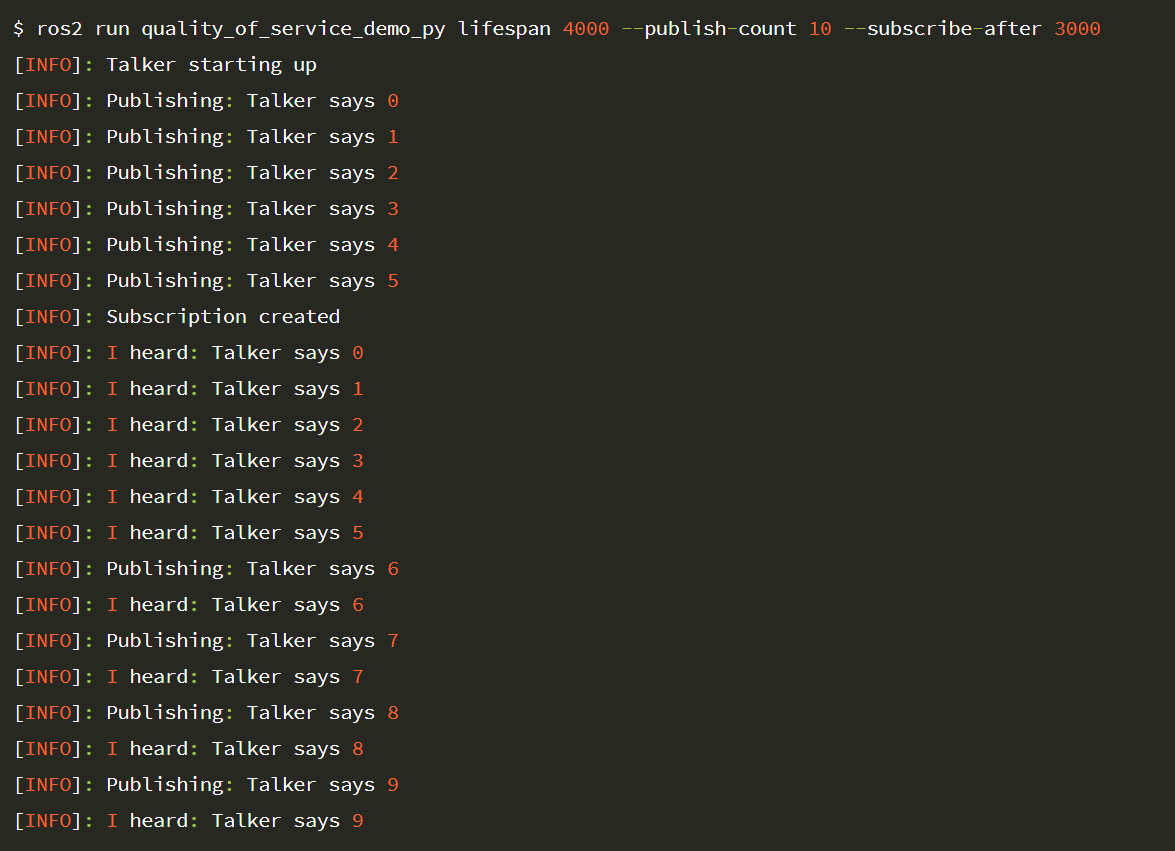

# Liveliness

Liveliness은 정해진 주기 안에서 노드 혹은 토픽의 생사 확인하는 QoS 옵션으로 AUTOMATIC, MANUAL_BY_NODE, MANUAL_BY_TOPIC 중 1개를 선택하여 자동 또는 매뉴얼로 확인할지를 지정하는 옵션과 Liveliness을 확인하는 주기를 설정하게 되어 있다. Liveliness는 quality_of_service_demo 예제의 liveliness.py 를 살펴보고 실행해보면서 더 자세히 알아보자.

하기 예제 코드에서는 Liveliness를 테스트하기 위해서 토픽 퍼블리셔인 Talker와 토픽 서브스크라이버인 Listener 모두 동일 qos_profile으로 depth는 10, Liveliness로 AUTOMATIC 또는 MANUAL_BY_TOPIC로 실행시 설정할 수 있도록 하였고 Liveliness의 주기는 노드 실행시 실행 인자로 입력하게 되어 있다.

/quality_of_service_demo_py/liveliness.py

https://github.com/ros2/demos/tree/master/quality_of_service_demo

아래의 예제를 실행하게 되면 /qos_listener와 /qos_talker이 동시에 실행되고 토픽 교환이 이루어진다. 그 후 2초가 지나면 퍼블리셔 노드인 /qos_talker을 종료하게 되는데 이 때 /qos_listener 노드에서는 liveliness로 설정한 1초 주기 동안 노드가 죽었다는 것을 확인하고 rclpy.qos_event 모듈의 liveliness 관련 콜백 함수를 실행하게 된다.

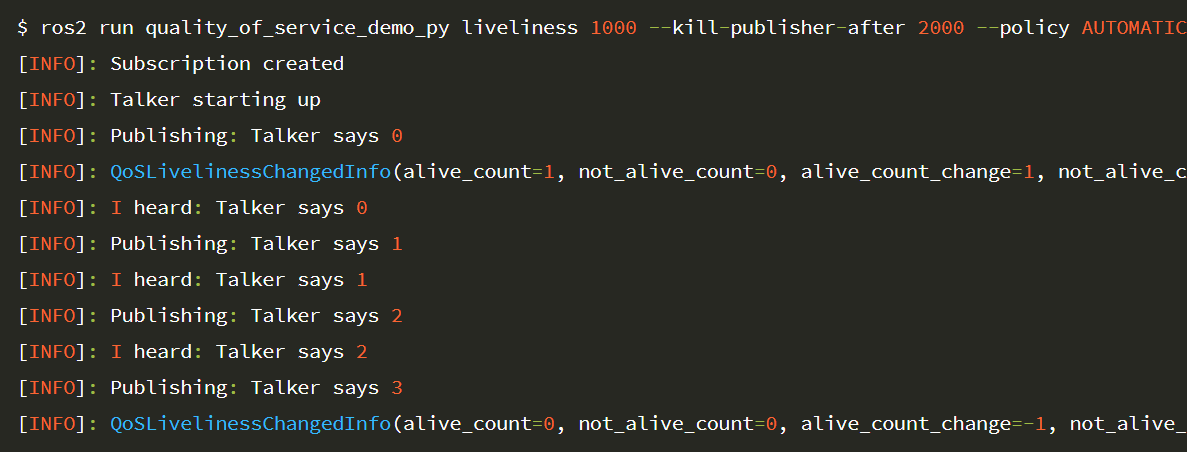

아래의 예제는 위와 비슷하나 MANUAL_BY_TOPIC으로 설정한 것으로 노드는 죽이지 않고 퍼블리시만 되지 않도록 설정했을 때의 결과를 볼 수 있는 예제이다.



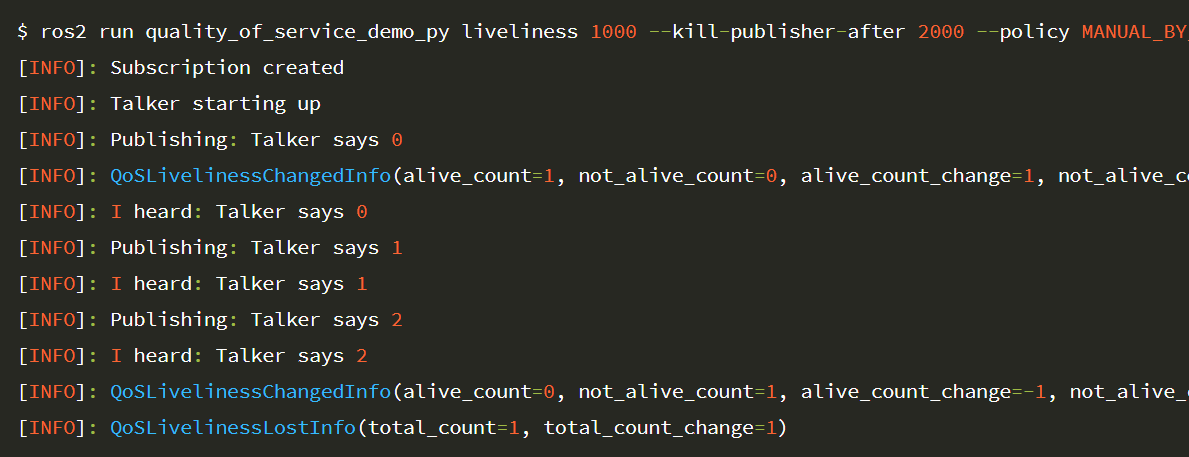

# 유용한 QoS 예제

quality_of_service_demo 예제에는 유용한 QoS 예제를 제공하고 있는데 위에서 언급되지 않은 예제로는 QoS Offered/Requested 예제와 Interactive Quality of Service 가 있다.

incompatible_qos 노드는 019 DDS의 QoS(Quality of Service) 강좌에서 언급한 RxO (requested by offered)를 체크할 수 있는 노드가 포함되어 있으니 필요시 이용하도록 하자. 아래는 그 중 durability를 체크하기 위한 옵션이다.



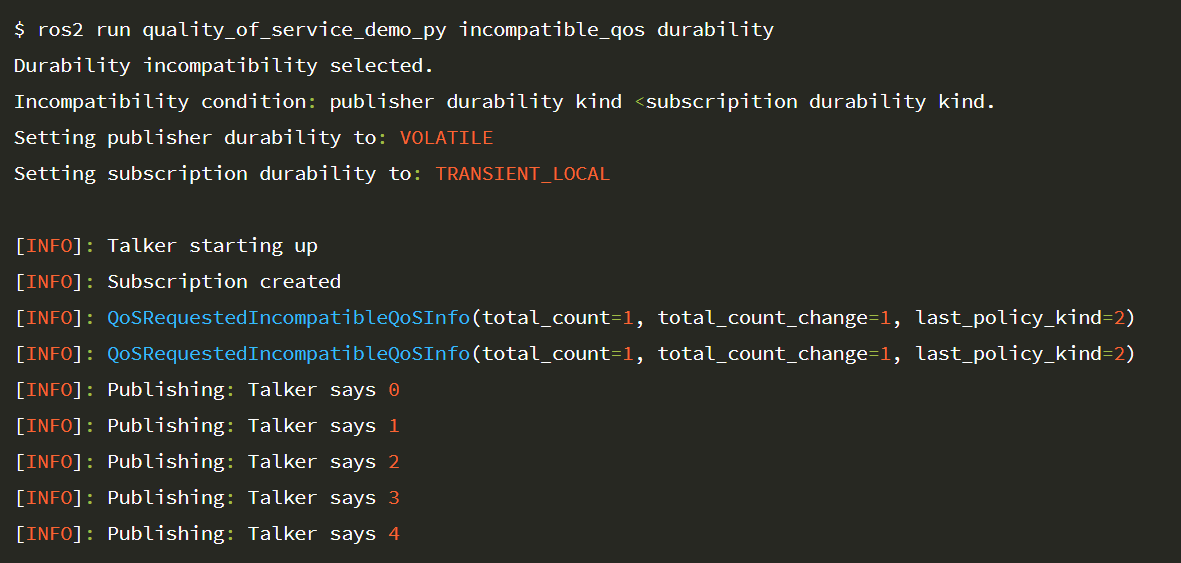

durability 이외에도 deadline, liveliness_policy, liveliness_lease_duration, reliability 옵션도 사용해보자.

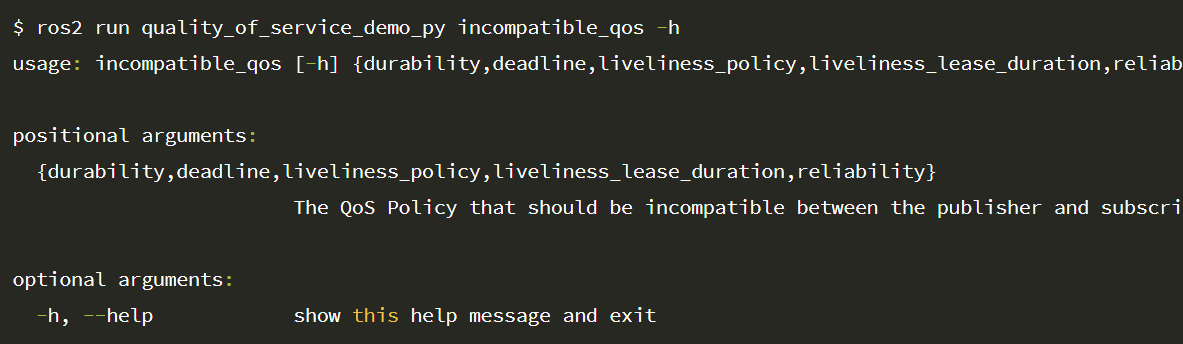

다음의 interactive_publisher 노드와 interactive_subscriber 노드는 우리가 지금까지 설명한 QoS를 변경해가며 그 효과를 확인해볼 수 있는 예제 노드이다. 필요한 경우 테스트해보자.

In [ ]:
ros2 run quality_of_service_demo_cpp interactive_publisher

In [ ]:
ros2 run quality_of_service_demo_cpp interactive_subscriber

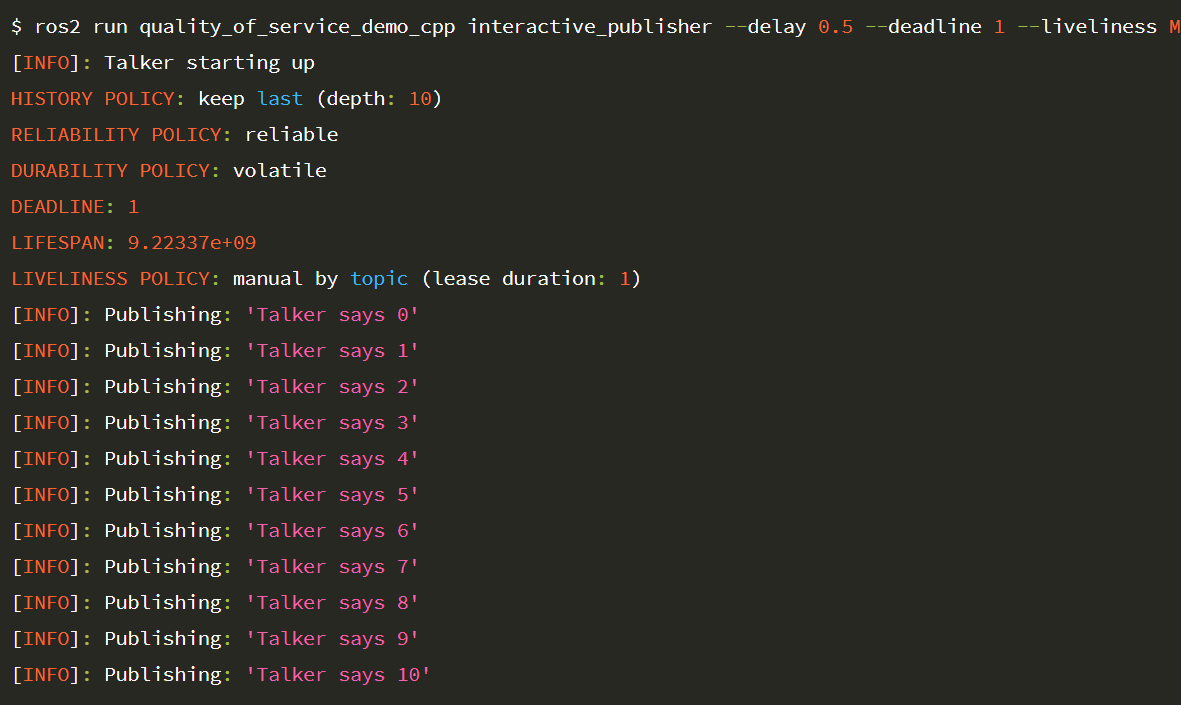

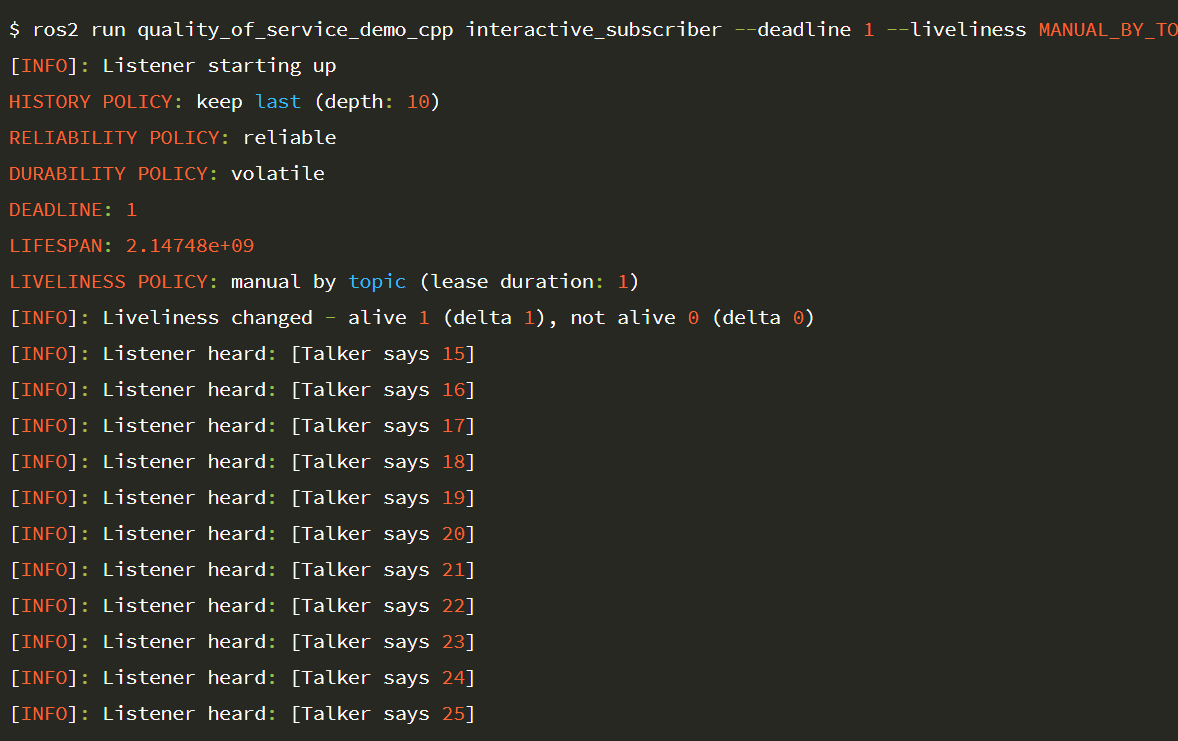